<a href="https://colab.research.google.com/github/JagritiPrakash/LSTM-Implementation/blob/master/LSTM_implementation_for_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Analysis with LSTM.
We will see how we can perform time series analysis with the help of a recurrent neural network. We will be predicting the future stock prices of the Apple Company (AAPL), based on its stock prices of the past 5 years.

At first, we import the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


For training our algorithm, we will be using the Apple stock prices from 1st January 2015 to 31 December 2019. We read the csv file using the pd.read_csv command of the pandas library.

In [ ]:
apple_complete_train = pd.read_csv('AAPL-3.csv')

The Apple stock price training file contains seven columns: Date, Open, High, Low, Close, Adj Close and Volume. Here, we will only be predicting the opening stock price, therefore we are not interested in the rest of the columns.

In [ ]:
apple_training_processed = apple_complete_train.iloc[:, 1:2].values

We will use MinMaxScaler class from the sklearn.preprocessing library to scale our data between 0 and 1. The feature_range parameter is used to specify the range of the scaled data. 

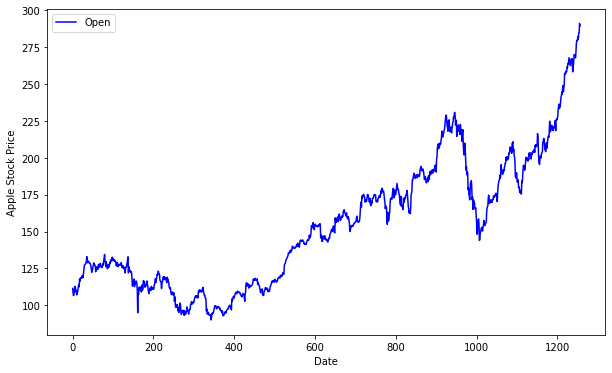

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(apple_training_processed, color='blue', label='Open')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

We can see that the trend is highly non-linear and it is very difficult to capture the trend using this information. This is where the power of LSTM can be utilized. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
apple_training_scaled = scaler.fit_transform(apple_training_processed)

Converting training data into right shape

In [ ]:
features_set = []
labels = []
for i in range(60, 1257):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

We need to convert both the feature_set and the labels list to the numpy array before we can use it for training. 

In [ ]:
features_set, labels = np.array(features_set), np.array(labels)

In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM. We need to convert our data into three-dimensional format.

In [ ]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

Installing Tensorflow and Keras library

In [ ]:
!pip install tensorflow
!pip install keras

We import the Sequential class from keras.models library and Dense, LSTM, and Dropout classes from keras.layers library.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

We instantiate the Sequential class. This will be our model class and we will add LSTM, Dropout and Dense layers to this model. 

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units = 1))

Finally, we need to compile our LSTM before we can train it on the training data.

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')


Model Training

In [ ]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

1197/1197 [==============================] - 5s 5ms/step - loss: 0.0022
Epoch 10/100
1197/1197 [==============================] - 6s 5ms/step - loss: 0.0023
Epoch 11/100
1197/1197 [==============================] - 5s 5ms/step - loss: 0.0023
Epoch 12/100
1197/1197 [==============================] - 5s 5ms/step - loss: 0.0022
Epoch 13/100
1197/1197 [==============================] - 5s 5ms/step - loss: 0.0021
Epoch 14/100
1197/1197 [==============================] - 5s 4ms/step - loss: 0.0020
Epoch 15/100
1197/1197 [==============================] - 5s 4ms/step - loss: 0.0019
Epoch 16/100
1197/1197 [==============================] - 6s 5ms/step - loss: 0.0021
Epoch 17/100
1197/1197 [==============================] - 5s 5ms/step - loss: 0.0021
Epoch 18/100
1197/1197 [==============================] - 5s 5ms/step - loss: 0.0017
Epoch 19/100
1197/1197 [==============================] - 5s 5ms/step - loss: 0.0018
Epoch 20/100
1197/1197 [==============================] - 6s 5ms/step - loss: 

We take the details of january 2020 for the testing purpose

In [ ]:
apple_testing_complete = pd.read_csv('AAPL-4.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values


Converting Test Data to Right Format

In [ ]:
apple_total = pd.concat((apple_complete_train['Open'], apple_testing_complete['Open']), axis=0)

In [ ]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

As we did for the training set, we need to scale our test data. 

In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [ ]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

Finally, we need to convert our data into the three-dimensional format which can be used as input to the LSTM.

In [ ]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

Making predictions

In [ ]:
predictions = model.predict(test_features)

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training.

In [ ]:
predictions = scaler.inverse_transform(predictions)

The prediction of future stock prices

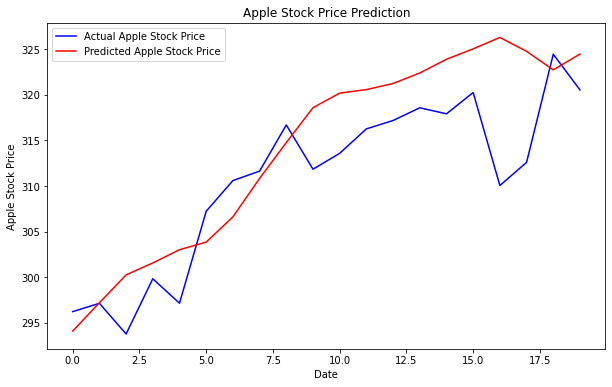

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In the output, the blue line represents the actual stock prices for the month of January 2020, while the red line represents the predicted stock prices. 
A long short-term memory network (LSTM) is one of the most commonly used neural networks for time series analysis. The ability of LSTM to remember previous information makes it ideal for such tasks.